### ♾️ simple workflow with graph

In [4]:
# show this later on
def function3(input3):
    return input3

In [5]:
def function1(input1):
    return input1 + "from first function"

def function2(input2):
    output=function3("this is function 3 in between")
    return input2 + " " + output + " and Divakar from second function"

In [6]:
from langgraph.graph import Graph

In [7]:
workflow1=Graph()

In [8]:
workflow1.add_node("function1", function1)

In [9]:
workflow1.add_node("function2",function2)

In [10]:
workflow1.add_edge("function1","function2")

In [11]:
workflow1.set_entry_point("function1")

In [12]:
workflow1.set_finish_point("function2")

In [13]:
app1=workflow1.compile()

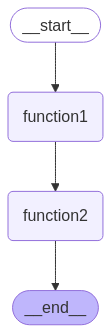

In [14]:
from IPython.display import Image, display

try:
    display(Image(app1.get_graph().draw_mermaid_png()))
except Exception as e:
    # This requires some extra dependencies and is optional
    print(e)

In [15]:
app1.invoke("hi this is Divakar ")

'hi this is Divakar from first function this is function 3 in between and Divakar from second function'

In [16]:
input="hi this is Divakar "

In [17]:
input="hi this is Divakar "
for output in app1.stream(input):
    for key,value in output.items():
        print(f"here is output from {key}")
        print("_______")
        print(value)
        print("\n")

here is output from function1
_______
hi this is Divakar from first function


here is output from function2
_______
hi this is Divakar from first function this is function 3 in between and Divakar from second function




#### Now lets create workflow with llm

In [18]:
from langchain_google_genai import GoogleGenerativeAIEmbeddings
embeddings = GoogleGenerativeAIEmbeddings(model="models/embedding-001")
from langchain_google_genai import ChatGoogleGenerativeAI
llm = ChatGoogleGenerativeAI(model="gemini-2.0-flash")
llm.invoke("hi").content

f:\dev25\Building-Agentic-AI\Langgraph_Agent\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


'Hi there! How can I help you today?'

In [19]:
def function1(input):
    llm = ChatGoogleGenerativeAI(model="gemini-2.0-flash")
    response=llm.invoke(input).content
    return response

In [20]:
def function2(input):
    upper_case=input.upper()
    return upper_case

In [21]:
from langgraph.graph import Graph
workflow2=Graph()

In [22]:
workflow2.add_node("llm",function1)

In [23]:
workflow2.add_node("upper_string",function2)

In [24]:
workflow2.add_edge("llm","upper_string")

In [25]:
workflow2.set_entry_point("llm")
workflow2.set_finish_point("upper_string")

In [26]:
app2=workflow2.compile()

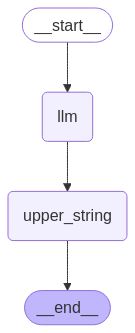

In [27]:
from IPython.display import Image, display

try:
    display(Image(app2.get_graph().draw_mermaid_png()))
except Exception as e:
    # This requires some extra dependencies and is optional
    print(e)

In [28]:
app2.invoke("What is RAG?")

'RAG STANDS FOR **RETRIEVAL-AUGMENTED GENERATION**. IT\'S A TECHNIQUE USED IN NATURAL LANGUAGE PROCESSING (NLP) THAT COMBINES THE STRENGTHS OF TWO DIFFERENT APPROACHES:\n\n*   **RETRIEVAL:** FINDING RELEVANT INFORMATION FROM A LARGE EXTERNAL KNOWLEDGE SOURCE (LIKE A DATABASE, A COLLECTION OF DOCUMENTS, OR THE INTERNET).\n*   **GENERATION:** CREATING NEW TEXT BASED ON THE RETRIEVED INFORMATION AND A GIVEN PROMPT.\n\n**HERE\'S A BREAKDOWN OF HOW IT WORKS:**\n\n1.  **USER QUERY:** THE PROCESS STARTS WITH A USER ASKING A QUESTION OR PROVIDING A PROMPT.\n\n2.  **RETRIEVAL:**\n    *   THE QUERY IS USED TO SEARCH A KNOWLEDGE BASE FOR RELEVANT INFORMATION. THIS COULD INVOLVE TECHNIQUES LIKE:\n        *   **SEMANTIC SEARCH:** USING EMBEDDINGS TO FIND DOCUMENTS THAT ARE SEMANTICALLY SIMILAR TO THE QUERY, EVEN IF THEY DON\'T CONTAIN THE EXACT SAME KEYWORDS.\n        *   **KEYWORD SEARCH:** A MORE TRADITIONAL APPROACH THAT LOOKS FOR DOCUMENTS CONTAINING SPECIFIC KEYWORDS FROM THE QUERY.\n    *   T

In [29]:
print(app2.invoke("what is genai explain in detail?"))

OKAY, LET'S BREAK DOWN WHAT GENAI (GENERATIVE AI) IS IN DETAIL.

**WHAT IS GENERATIVE AI (GENAI)?**

GENERATIVE AI REFERS TO A CATEGORY OF ARTIFICIAL INTELLIGENCE (AI) ALGORITHMS AND MODELS DESIGNED TO **CREATE NEW CONTENT** THAT IS SIMILAR TO, BUT DISTINCT FROM, THE DATA IT WAS TRAINED ON.  INSTEAD OF SIMPLY CLASSIFYING, PREDICTING, OR ANALYZING EXISTING DATA, GENAI *GENERATES* COMPLETELY NEW OUTPUTS. THESE OUTPUTS CAN TAKE VARIOUS FORMS, INCLUDING:

*   **TEXT:** WRITING ARTICLES, POEMS, SCRIPTS, EMAILS, CODE, SUMMARIES, TRANSLATIONS, ETC.
*   **IMAGES:** CREATING REALISTIC OR ARTISTIC IMAGES, EDITING EXISTING IMAGES, GENERATING VARIATIONS OF IMAGES.
*   **AUDIO:** COMPOSING MUSIC, GENERATING SPEECH, CREATING SOUND EFFECTS.
*   **VIDEO:** PRODUCING SHORT VIDEOS, ANIMATIONS, EDITING EXISTING VIDEO FOOTAGE.
*   **3D MODELS:** GENERATING 3D OBJECTS FOR DESIGN, GAMES, OR SIMULATIONS.
*   **CODE:** WRITING CODE IN VARIOUS PROGRAMMING LANGUAGES BASED ON DESCRIPTIONS OR EXAMPLES.
*   **DATA

In [30]:
input="what is a name of first US President?"

In [31]:
for output in app2.stream(input):
    for key,value in output.items():
        print(f"here is output from {key}")
        print("_______")
        print(value)
        print("\n")

here is output from llm
_______
The name of the first US President was **George Washington**.


here is output from upper_string
_______
THE NAME OF THE FIRST US PRESIDENT WAS **GEORGE WASHINGTON**.




Here lets create our own output token counter

In [32]:
def function3(input):
    token=input.split()
    token_number=len(token)
    token_number=f"total token number is {token_number}"
    return token_number

In [33]:
workflow3=Graph()
workflow3.add_node("llm",function1)
workflow3.add_node("token_counter",function3)
workflow3.add_edge("llm","token_counter")
workflow3.set_entry_point("llm")
workflow3.set_finish_point("token_counter")
app3=workflow3.compile()

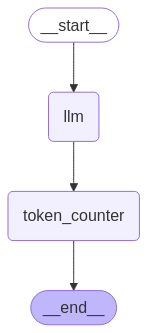

In [34]:
from IPython.display import Image, display

try:
    display(Image(app3.get_graph().draw_mermaid_png()))
except Exception as e:
    # This requires some extra dependencies and is optional
    print(e)

In [35]:
app3.invoke("what is a name of first US President?")


'total token number is 10'

In [36]:
app3.invoke("what is genai explain in detail?")

'total token number is 1477'

In [37]:
from langchain_community.tools.tavily_search import TavilySearchResults

tool = TavilySearchResults(max_results=2)
tools = [tool]
tool.invoke("What's a 'node' in LangGraph?")

[{'url': 'https://langchain-ai.github.io/langgraph/concepts/low_level/',
  'content': 'In LangGraph, nodes are typically python functions (sync or async) where the first positional argument is the state, and (optionally), the second positional argument is a "config", containing optional configurable parameters (such as a thread_id).\nSimilar to NetworkX, you add these nodes to a graph using the add_node method:\n[](https://langchain-ai.github.io/langgraph/concepts/low_level/#__codelineno-7-1)fromlangchain_core.runnablesimport RunnableConfig [...] LangGraph Glossary¶\nGraphs¶\nAt its core, LangGraph models agent workflows as graphs. You define the behavior of your agents using three key components:\n\n\nState: A shared data structure that represents the current snapshot of your application. It can be any Python type, but is typically a TypedDict or Pydantic BaseModel.\n\n\nNodes: Python functions that encode the logic of your agents. They receive the current State as input, perform some

Integrating a RAG Pipeline🪈

In [38]:
from langchain_google_genai import GoogleGenerativeAIEmbeddings
embeddings = GoogleGenerativeAIEmbeddings(model="models/embedding-001")

In [39]:
from langchain_google_genai import ChatGoogleGenerativeAI
llm = ChatGoogleGenerativeAI(model="gemini-2.0-flash")

In [40]:
llm.invoke("hi").content

'Hi there! How can I help you today?'

In [41]:
from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.runnables import RunnablePassthrough
from langchain_community.document_loaders import TextLoader, DirectoryLoader
from langchain_community.vectorstores import Chroma
from langchain.text_splitter import RecursiveCharacterTextSplitter

In [42]:
loader=DirectoryLoader("../data",glob="./*.txt",loader_cls=lambda p: TextLoader(p, encoding="utf-8"))
docs=loader.load()
text_splitter=RecursiveCharacterTextSplitter(
    chunk_size=100,
    chunk_overlap=50
)
new_docs = text_splitter.split_documents(documents=docs)
doc_strings = [doc.page_content for doc in new_docs]

In [43]:
db = Chroma.from_documents(new_docs, embeddings)

retriever = db.as_retriever(search_kwargs={"k": 3})

In [44]:
query = "what is LangGraph"
docs = retriever.get_relevant_documents(query)
print(docs[0].metadata)
print(docs[0].page_content)

for doc in docs:
    print(doc)

C:\Users\divak\AppData\Local\Programs\Python\Python311\ipykernel_22092\681680962.py:2: LangChainDeprecationWarning: The method `BaseRetriever.get_relevant_documents` was deprecated in langchain-core 0.1.46 and will be removed in 1.0. Use :meth:`~invoke` instead.
  docs = retriever.get_relevant_documents(query)


{'source': '..\\data\\output.txt'}
LangGraph's flexibility and integration with the LangChain ecosystem make it a powerful tool for
page_content='LangGraph's flexibility and integration with the LangChain ecosystem make it a powerful tool for' metadata={'source': '..\\data\\output.txt'}
page_content='model (LLM) operations in a specific sequence, LangGraph is tailored for creating stateful,' metadata={'source': '..\\data\\output.txt'}
page_content='​LangGraph is an open-source orchestration framework designed to build stateful, multi-agent systems' metadata={'source': '..\\data\\output.txt'}


In [45]:
def function_1(AgentState):
    
    message=AgentState["messages"]
    
    question=message[-1]
    
    complete_prompt="Your task is to provide only the brief answer based on the user query. \
        Don't include too much reasoning. Following is the user query: " + question
    
    response = llm.invoke(complete_prompt)
    
    AgentState['messages'].append(response.content) # appending LLM call response to the AgentState
    
    #print(AgentState)
    
    return AgentState

In [46]:
AgentState={}

In [47]:
AgentState["messages"]=[]

In [48]:
AgentState

{'messages': []}

In [49]:
AgentState["messages"].append("hi, how are you?")

In [50]:
AgentState

{'messages': ['hi, how are you?']}

In [51]:
AgentState["messages"].append("hi, what you doing?")

In [52]:
AgentState

{'messages': ['hi, how are you?', 'hi, what you doing?']}

In [53]:
def function_2(AgentState):
    messages = AgentState['messages']
    question = messages[0] ## Fetching the user question

    template = """Answer the question based only on the following context:
    {context}

    Question: {question}
    """
    prompt = ChatPromptTemplate.from_template(template)

    retrieval_chain = (
        {"context": retriever, "question": RunnablePassthrough()}
        | prompt
        | llm
        | StrOutputParser()
        )
    result = retrieval_chain.invoke(question)
    return result

In [54]:
# Define a Langchain graph
from langgraph.graph import Graph
workflow4 = Graph()
workflow4.add_node("LLM", function_1)
workflow4.add_node("RAGtool", function_2)
workflow4.add_edge('LLM', 'RAGtool')
workflow4.set_entry_point("LLM")
workflow4.set_finish_point("RAGtool")
app4 = workflow4.compile()

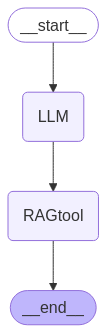

In [55]:
from IPython.display import Image, display

try:
    display(Image(app4.get_graph().draw_mermaid_png()))
except Exception as e:
    # This requires some extra dependencies and is optional
    print(e)

In [56]:
inputs = {"messages": ["Tell me about LangGraph"]}

In [57]:
for output in app4.stream(inputs):
    # stream() yields dictionaries with output keyed by node name
    for key, value in output.items():
        print(f"Output from node '{key}':")
        print("---")
        print(value)
    print("\n---\n")

Output from node 'LLM':
---
{'messages': ['Tell me about LangGraph', 'LangGraph is a Python library for building robust and stateful conversational AI applications.']}

---

Output from node 'RAGtool':
---
LangGraph is flexible, integrates with LangChain, and is tailored for creating stateful, multi-agent systems with dynamic and interactive model operations in a specific sequence. It is a powerful tool.

---



In [58]:
loader2=DirectoryLoader("../data2",glob="./*.txt",loader_cls=lambda p: TextLoader(p, encoding="utf-8"))
docs2=loader2.load()

text_splitter=RecursiveCharacterTextSplitter(
    chunk_size=100,
    chunk_overlap=50
)
new_docs2 = text_splitter.split_documents(documents=docs2)
doc_strings2 = [doc.page_content for doc in new_docs2]

In [59]:
db2 = Chroma.from_documents(new_docs2, embeddings)
retriever2 = db2.as_retriever(search_kwargs={"k": 3})

In [60]:
query = "Tell me about India's Industrial Growth?"
docs = retriever2.get_relevant_documents(query)
print(docs[0].metadata)
print(docs[0].page_content)

for doc in docs:
    print(doc)

{'source': '..\\data2\\indian_economy.txt'}
India’s industrial growth has outpaced expectations, raising hopes that the economy will avoid a
page_content='India’s industrial growth has outpaced expectations, raising hopes that the economy will avoid a' metadata={'source': '..\\data2\\indian_economy.txt'}
page_content='India’s strong export sectors—including textiles, IT services, and automotive manufacturing—had' metadata={'source': '..\\data2\\indian_economy.txt'}
page_content='India’s last eight years of GDP (hypothetical data):' metadata={'source': '..\\data2\\indian_economy.txt'}


1. TypedDict:
TypedDict is a special type that allows you to define a dictionary in Python where each key has a specific type. It’s useful when you want to enforce type checks on the keys and values of a dictionary.

2. Annotated:
Annotated is used to add metadata or constraints to a type. It’s typically used for adding additional information, like constraints or descriptions, to the type.

3. Sequence[BaseMessage]:
Sequence is a generic type from Python's typing module that represents a list-like structure (such as a list or tuple) where the order matters, and you can access elements by their position.

4. BaseMessage:
Basemessage: This assumes you're working with the LangChain framework, and BaseMessage is part of its core messaging system. It is typically used when handling or processing messages in LangChain's workflows

5. operator.add:
operator.add is a function from Python’s operator module that performs addition (+) on its arguments. In this context, operator.add is being used as metadata for the Annotated type, likely suggesting that the sequence of BaseMessage objects is meant to be "added" or concatenated with another sequence at some point. It’s an indicator of how the messages field will be treated in the logic of your program.

* TopicSelectionParser: A Pydantic model that defines two fields (Topic and Reasoning), both of which are required to be strings.

* Field: Adds metadata, like descriptions, and can also be used for validation and constraints.

* Pydantic’s Role: Ensures that the data matches the expected structure and types, raising validation errors if the data is invalid.

In [61]:
from typing import TypedDict, Annotated, Sequence
import operator
from langchain_core.messages import BaseMessage
from langchain.prompts import PromptTemplate

In [62]:
class AgentState(TypedDict):
    # The 'messages' field should be a sequence of strings, and we annotate it with 'operator.add'
    # This implies we might want to "add" new messages to the sequence later
    messages: Annotated[Sequence[BaseMessage], operator.add]

#### Putting It All Together:
* The line messages: Annotated[Sequence[BaseMessage], operator.add] defines a field messages that:

* Must be a sequence (like a list or tuple) of BaseMessage objects. Has the additional annotation operator.add, which suggests that this sequence is intended to support addition (i.e., concatenation of multiple sequences of messages).

messages: Annotated[Sequence[BaseMessage], operator.add]

"messages": [BaseMessage("Hello!", "Alice"), BaseMessage("Hi!", "Bob")]

In [63]:
from pydantic import BaseModel , Field
class TopicSelectionParser(BaseModel):
    Topic: str = Field(description='Selected Topic')
    Reasoning: str = Field(description='Reasoning behind topic selection')

In [64]:
from langchain.output_parsers import PydanticOutputParser
parser = PydanticOutputParser(pydantic_object=TopicSelectionParser)

In [65]:
print(parser.get_format_instructions())

The output should be formatted as a JSON instance that conforms to the JSON schema below.

As an example, for the schema {"properties": {"foo": {"title": "Foo", "description": "a list of strings", "type": "array", "items": {"type": "string"}}}, "required": ["foo"]}
the object {"foo": ["bar", "baz"]} is a well-formatted instance of the schema. The object {"properties": {"foo": ["bar", "baz"]}} is not well-formatted.

Here is the output schema:
```
{"properties": {"Topic": {"description": "Selected Topic", "title": "Topic", "type": "string"}, "Reasoning": {"description": "Reasoning behind topic selection", "title": "Reasoning", "type": "string"}}, "required": ["Topic", "Reasoning"]}
```


The output should be formatted as a JSON instance that conforms to the JSON schema below.

As an example, for the schema {"properties": {"foo": {"title": "Foo", "description": "a list of strings", "type": "array", "items": {"type": "string"}}}, "required": ["foo"]} the object {"foo": ["bar", "baz"]} is a well-formatted instance of the schema. The object {"properties": {"foo": ["bar", "baz"]}} is not well-formatted.

Here is the output schema:

{"properties": {"Topic": {"description": "Selected Topic", "title": "Topic", "type": "string"}, "Reasoning": {"description": "Reasoning behind topic selection", "title": "Reasoning", "type": "string"}}, "required": ["Topic", "Reasoning"]}

In [66]:
def function_1(state):
    message=state["messages"]
    question=message[-1]
    print(question)
    
    template="""
    Your task is to classify the given user query into one of the following categories: [India, Not Related]. 
    Only respond with the category name and nothing else.

    User query: {question}
    {format_instructions}
    """
    
    prompt = PromptTemplate(template=template,
                                    input_variables=[question],
                                    partial_variables={
                                        "format_instructions" : parser.get_format_instructions()                                    }
                                    )
    chain =  prompt | llm | parser
    
    response = chain.invoke({"question":question,"format_instructions" : parser.get_format_instructions() })

    print(response)

    return {"messages": [response.Topic]}

In [67]:
template="""
    Your task is to classify the given user query into one of the following categories: [India, Not Related]. 
    Only respond with the category name and nothing else.

    User query: "Tell me about India's Industrial Growth"
    The output should be formatted as a JSON instance that conforms to the JSON schema below.

    As an example, for the schema {"properties": {"foo": {"title": "Foo", "description": "a list of strings", "type": "array", "items": {"type": "string"}}}, "required": ["foo"]}
    the object {"foo": ["bar", "baz"]} is a well-formatted instance of the schema. The object {"properties": {"foo": ["bar", "baz"]}} is not well-formatted.

    Here is the output schema:
    ```
    {"properties": {"Topic": {"description": "Selected Topic", "title": "Topic", "type": "string"}, "Reasoning": {"description": "Reasoning behind topic selection", "title": "Reasoning", "type": "string"}}, "required": ["Topic", "Reasoning"]}
        """

template=""" Your task is to classify the given user query into one of the following categories: [India, Not Related]. Only respond with the category name and nothing else.

User query: "Tell me about India's Industrial Growth"
The output should be formatted as a JSON instance that conforms to the JSON schema below.

As an example, for the schema {"properties": {"foo": {"title": "Foo", "description": "a list of strings", "type": "array", "items": {"type": "string"}}}, "required": ["foo"]}
the object {"foo": ["bar", "baz"]} is a well-formatted instance of the schema. The object {"properties": {"foo": ["bar", "baz"]}} is not well-formatted.

Here is the output schema:
```
{"properties": {"Topic": {"description": "Selected Topic", "title": "Topic", "type": "string"}, "Reasoning": {"description": "Reasoning behind topic selection", "title": "Reasoning", "type": "string"}}, "required": ["Topic", "Reasoning"]}
    """

In [68]:
state={"messages": ["Tell me about India's Industrial Growth"]}

In [69]:
function_1(state)

Tell me about India's Industrial Growth
Topic='India' Reasoning="The query explicitly mentions 'India's Industrial Growth', indicating a clear focus on India."


{'messages': ['India']}

In [70]:
def router(state):
    print('-> Router ->')
    
    messages = state["messages"]
    last_message = messages[-1]
    print(last_message)
    if 'India' in last_message:
        return 'RAG Call'
    else:
        return 'LLM Call'

In [71]:
def function_2(state):
    print('-> Calling RAG ->')
    messages = state['messages']
    question = messages[0] ## Fetching the user question
    print(question)

    template = """Answer the question based only on the following context:
    {context}

    Question: {question}
    """
    prompt = ChatPromptTemplate.from_template(template)
    
    print(prompt)

    retrieval_chain = (
        {"context": retriever, "question": RunnablePassthrough()}
        | prompt
        | llm
        | StrOutputParser()
        )
    result = retrieval_chain.invoke(question)
    return  {"messages": [result]}

In [72]:
def function_3(state):
    print('-> Calling LLM ->')

    messages = state['messages']
    question = messages[0] ## Fetching the user question

    # Normal LLM call
    complete_query = "Anwer the follow question with your knowledge of the real world. Following is the user question: " + question
    response = llm.invoke(complete_query)
    return {"messages": [response.content]}

In [73]:
AgentState

__main__.AgentState

In [74]:
from langgraph.graph import StateGraph,END

workflow5 = StateGraph(AgentState) ### StateGraph with AgentState


workflow5.add_node("agent", function_1)

workflow5.add_node("RAG", function_2)

workflow5.add_node("LLM", function_3)


workflow5.set_entry_point("agent")

workflow5.add_conditional_edges(
    "agent",
    
    
    router,
    {
        "RAG Call": "RAG",
        "LLM Call": "LLM",
    }
)

workflow5.add_edge("RAG",END)


workflow5.add_edge("LLM",END)


app5=workflow5.compile()

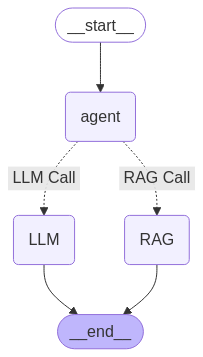

In [75]:
from IPython.display import Image, display

try:
    display(Image(app5.get_graph().draw_mermaid_png()))
except Exception as e:
    # This requires some extra dependencies and is optional
    print(e)

In [76]:
inputs = {"messages": ["Tell me about USA Industrial Growth"]}

In [77]:
output = app5.invoke(inputs)

Tell me about USA Industrial Growth
Topic='Not Related' Reasoning='The query is about USA, not India.'
-> Router ->
Not Related
-> Calling LLM ->


In [78]:
output

{'messages': ['Tell me about USA Industrial Growth',
  'Not Related',
  "The industrial growth of the United States has been a long and transformative journey, shaping not only the American economy but also the global landscape. Here's a look at its key stages and drivers:\n\n**1. The First Industrial Revolution (Late 18th Century - Mid 19th Century):**\n\n*   **Focus:** Primarily textile production, powered by water and later steam.\n*   **Key Innovations:**\n    *   **Textile Mills:**  The invention of the power loom and spinning jenny revolutionized cloth production, leading to the growth of factories.\n    *   **Steam Engine:** Enabled factories to move away from water sources and powered transportation.\n    *   **Interchangeable Parts:** Eli Whitney's concept, initially for firearms, laid the groundwork for mass production.\n*   **Key Industries:** Textiles, iron production, shipbuilding.\n*   **Impact:**\n    *   Shift from agrarian society to manufacturing.\n    *   Growth of c

In [79]:
inputs = {"messages": ["Tell me about India's Industrial Growth"]}

In [80]:
output = app5.invoke(inputs)

Tell me about India's Industrial Growth
Topic='India' Reasoning="The query explicitly mentions 'India's Industrial Growth'."
-> Router ->
India
-> Calling RAG ->
Tell me about India's Industrial Growth
input_variables=['context', 'question'] input_types={} partial_variables={} messages=[HumanMessagePromptTemplate(prompt=PromptTemplate(input_variables=['context', 'question'], input_types={}, partial_variables={}, template='Answer the question based only on the following context:\n    {context}\n\n    Question: {question}\n    '), additional_kwargs={})]


In [81]:
output

{'messages': ["Tell me about India's Industrial Growth",
  'India',
  "India's industrial growth has outpaced expectations."]}

In [82]:
inputs = {"messages": ["who build the Taj Mahal?"]}

In [83]:
output = app5.invoke(inputs)

who build the Taj Mahal?
Topic='India' Reasoning='The Taj Mahal is located in India and is a significant part of Indian history and culture.'
-> Router ->
India
-> Calling RAG ->
who build the Taj Mahal?
input_variables=['context', 'question'] input_types={} partial_variables={} messages=[HumanMessagePromptTemplate(prompt=PromptTemplate(input_variables=['context', 'question'], input_types={}, partial_variables={}, template='Answer the question based only on the following context:\n    {context}\n\n    Question: {question}\n    '), additional_kwargs={})]


In [84]:
output 

{'messages': ['who build the Taj Mahal?',
  'India',
  'This question cannot be answered from the given context. The provided documents discuss the Indian economy, specifically export sectors like textiles, IT services, and automotive manufacturing, as well as the demand for Indian IT services and pharmaceuticals. There is no mention of the Taj Mahal or its construction.']}

In [85]:
inputs = {"messages": ["who is a president of USA?"]}

In [86]:
output = app5.invoke(inputs)

who is a president of USA?
Topic='Not Related' Reasoning='The query is about the president of the USA, not India.'
-> Router ->
Not Related
-> Calling LLM ->


In [87]:
output

{'messages': ['who is a president of USA?',
  'Not Related',
  'The current President of the United States is **Joe Biden**.']}

In [88]:
import os
from dotenv import load_dotenv
load_dotenv()
GOOGLE_API_KEY=os.getenv("GOOGLE_API_KEY")
TAVILY_API_KEY=os.getenv("TAVILY_API_KEY")
GROQ_API_KEY=os.getenv("GROQ_API_KEY")

os.environ["GOOGLE_API_KEY"] = GOOGLE_API_KEY
os.environ["TAVILY_API_KEY"] = TAVILY_API_KEY
os.environ["GROQ_API_KEY"]= GROQ_API_KEY

LANGSMITH_API_KEY=os.getenv("LANGSMITH_API_KEY")
LANGSMITH_PROJECT=os.getenv("LANGSMITH_PROJECT")
os.environ["LANGSMITH_TRACING"]="true"
os.environ["LANGSMITH_ENDPOINT"]="https://api.smith.langchain.com"

In [89]:
from langchain_huggingface import HuggingFaceEmbeddings
embeddings=HuggingFaceEmbeddings(model_name="all-MiniLM-L6-v2")

In [90]:
from langchain_groq import ChatGroq
llm=ChatGroq(model_name="meta-llama/llama-4-scout-17b-16e-instruct")

In [91]:
'''
from langchain_google_genai import GoogleGenerativeAIEmbeddings
embeddings = GoogleGenerativeAIEmbeddings(model="models/embedding-001")
from langchain_google_genai import ChatGoogleGenerativeAI
llm = ChatGoogleGenerativeAI(model="gemini-1.0-pro")
llm.invoke("hi").content'''

'\nfrom langchain_google_genai import GoogleGenerativeAIEmbeddings\nembeddings = GoogleGenerativeAIEmbeddings(model="models/embedding-001")\nfrom langchain_google_genai import ChatGoogleGenerativeAI\nllm = ChatGoogleGenerativeAI(model="gemini-1.0-pro")\nllm.invoke("hi").content'

In [92]:
import json
#from langchain_core.messages import ToolMessage
from langchain_core.tools import tool
from langchain_core.utils.function_calling import convert_to_openai_tool

In [93]:
@tool
def multiply(first_number: int, second_number: int):
    """Multiplies two numbers together."""
    return first_number * second_number

In [94]:
tools=[convert_to_openai_tool(multiply)]

In [95]:
model_with_tools = llm.bind(tools=tools)

In [96]:
response = model_with_tools.invoke('What is 35 * 46?')

In [97]:
response

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_mdax', 'function': {'arguments': '{"first_number": 35, "second_number": 46}', 'name': 'multiply'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 22, 'prompt_tokens': 206, 'total_tokens': 228, 'completion_time': 0.043364948, 'prompt_time': 0.008871684, 'queue_time': 0.049580856, 'total_time': 0.052236632}, 'model_name': 'meta-llama/llama-4-scout-17b-16e-instruct', 'system_fingerprint': 'fp_5b1ac042bf', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-bf99bf00-0444-4190-97fb-081f666d91d6-0', tool_calls=[{'name': 'multiply', 'args': {'first_number': 35, 'second_number': 46}, 'id': 'call_mdax', 'type': 'tool_call'}], usage_metadata={'input_tokens': 206, 'output_tokens': 22, 'total_tokens': 228})

In [98]:
tool_calls = response.additional_kwargs.get('tool_calls')

In [99]:
tool_calls

[{'id': 'call_mdax',
  'function': {'arguments': '{"first_number": 35, "second_number": 46}',
   'name': 'multiply'},
  'type': 'function'}]

In [100]:
for tool_call in tool_calls:
    print('Function Name:',tool_call.get('function').get('name'))
    print('Function Arguments:',tool_call.get('function').get('arguments'))
    print(tool_call)

Function Name: multiply
Function Arguments: {"first_number": 35, "second_number": 46}
{'id': 'call_mdax', 'function': {'arguments': '{"first_number": 35, "second_number": 46}', 'name': 'multiply'}, 'type': 'function'}


In [101]:
from typing import TypedDict, Annotated, Sequence
import operator
from langchain_core.messages import BaseMessage

In [102]:
class AgentState(TypedDict):
    messages: Annotated[Sequence[BaseMessage], operator.add]

In [103]:
def invoke_model(state):
    messages = state['messages']
    question = messages[-1]   ## Fetching the user question
    return {"messages":[model_with_tools.invoke(question)]}

In [104]:
input={"messages":["how much is 30*35?"]}

In [105]:
invoke_model(input)

{'messages': [AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_fsh5', 'function': {'arguments': '{"first_number": 30, "second_number": 35}', 'name': 'multiply'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 22, 'prompt_tokens': 207, 'total_tokens': 229, 'completion_time': 0.043230291, 'prompt_time': 0.007363977, 'queue_time': 0.046630878, 'total_time': 0.050594268}, 'model_name': 'meta-llama/llama-4-scout-17b-16e-instruct', 'system_fingerprint': 'fp_699032b16f', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-bd4a567c-e8bd-47b9-9e80-c9724f830176-0', tool_calls=[{'name': 'multiply', 'args': {'first_number': 30, 'second_number': 35}, 'id': 'call_fsh5', 'type': 'tool_call'}], usage_metadata={'input_tokens': 207, 'output_tokens': 22, 'total_tokens': 229})]}

In [127]:
def invoke_tool(state):
    tool_calls = state['messages'][-1].additional_kwargs.get("tool_calls", [])
    print(f"here is a tool_calls {tool_calls}")
    multiply_call = None

    for tool_call in tool_calls:
        if tool_call.get("function").get("name") == "multiply":
            multiply_call = tool_call

    if multiply_call is None:
        # Don't raise an error — just return same messages
        print("No tool call for 'multiply' found.")
        return {"messages": state["messages"]}

    res = multiply.invoke(
        json.loads(multiply_call.get("function").get("arguments"))
    )

    return {"messages": state["messages"] + [res]}


In [128]:
from langgraph.graph import StateGraph,END
workflow6 = StateGraph(AgentState) ### StateGraph with AgentState
workflow6.add_node("agent", invoke_model)
workflow6.add_node("tool", invoke_tool)

In [129]:
workflow6.add_edge("tool", END)
workflow6.set_entry_point("agent")

In [130]:
def router(state):
    tool_calls = state['messages'][-1].additional_kwargs.get("tool_calls", [])
    if len(tool_calls):
        return "multiply"
    else:
        return "end"

In [131]:
workflow6.add_conditional_edges("agent",router,{"multiply": "tool","end": END})

In [132]:
app6 = workflow6.compile()

In [133]:
from IPython.display import Image, display

try:
    display(Image(app6.get_graph().draw_mermaid_png()))
except Exception as e:
    # This requires some extra dependencies and is optional
    print(e)

HTTPSConnectionPool(host='mermaid.ink', port=443): Read timed out. (read timeout=10)


In [134]:
mermaid_code = app6.get_graph().draw_mermaid()
print(mermaid_code)

%%{init: {'flowchart': {'curve': 'linear'}}}%%
graph TD;
	__start__([<p>__start__</p>]):::first
	agent(agent)
	tool(tool)
	__end__([<p>__end__</p>]):::last
	__start__ --> agent;
	tool --> __end__;
	agent -. &nbsp;multiply&nbsp; .-> tool;
	agent -. &nbsp;end&nbsp; .-> __end__;
	classDef default fill:#f2f0ff,line-height:1.2
	classDef first fill-opacity:0
	classDef last fill:#bfb6fc



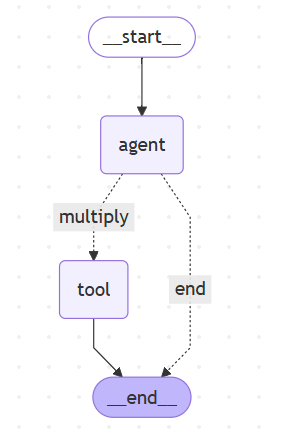

In [ ]:
app6.invoke({"messages": ["What is LLM?"]}) +

{'messages': ['What is LLM?',
  AIMessage(content='<function=brave_search>{"query": "LLM definition"}<function=brave_search>', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 22, 'prompt_tokens': 407, 'total_tokens': 429, 'completion_time': 0.046033671, 'prompt_time': 0.01816174, 'queue_time': -0.068258545, 'total_time': 0.064195411}, 'model_name': 'meta-llama/llama-4-scout-17b-16e-instruct', 'system_fingerprint': 'fp_5b1ac042bf', 'finish_reason': 'stop', 'logprobs': None}, id='run-4079e344-75cc-4677-9831-b04bd2d5a12e-0', usage_metadata={'input_tokens': 407, 'output_tokens': 22, 'total_tokens': 429})]}

In [136]:
app6.invoke({"messages": ["What is 123 * 456?"]})

here is a tool_calls [{'id': 'call_wbvx', 'function': {'arguments': '{"first_number": 123, "second_number": 456}', 'name': 'multiply'}, 'type': 'function'}]


{'messages': ['What is 123 * 456?',
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_wbvx', 'function': {'arguments': '{"first_number": 123, "second_number": 456}', 'name': 'multiply'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 22, 'prompt_tokens': 206, 'total_tokens': 228, 'completion_time': 0.045361805, 'prompt_time': 0.008840427, 'queue_time': 0.046207248, 'total_time': 0.054202232}, 'model_name': 'meta-llama/llama-4-scout-17b-16e-instruct', 'system_fingerprint': 'fp_699032b16f', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-62deea80-4cdc-49fa-9f10-abf8cb76c5d2-0', tool_calls=[{'name': 'multiply', 'args': {'first_number': 123, 'second_number': 456}, 'id': 'call_wbvx', 'type': 'tool_call'}], usage_metadata={'input_tokens': 206, 'output_tokens': 22, 'total_tokens': 228}),
  'What is 123 * 456?',
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_wbvx', 'function': {'arguments': '{"first_number":

In [137]:
for output in app6.stream({"messages": ["What is 123 * 456?"]}):
    for key,value in output.items():
        print(f"here is output from {key}")
        print("_______")
        print(value)
        print("\n")

here is output from agent
_______
{'messages': [AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_brbc', 'function': {'arguments': '{"first_number": 123, "second_number": 456}', 'name': 'multiply'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 22, 'prompt_tokens': 206, 'total_tokens': 228, 'completion_time': 0.04679757, 'prompt_time': 0.009161795, 'queue_time': 0.04690551, 'total_time': 0.055959365}, 'model_name': 'meta-llama/llama-4-scout-17b-16e-instruct', 'system_fingerprint': 'fp_5b1ac042bf', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-9f0d10c0-69e5-428a-b825-2814a0c156af-0', tool_calls=[{'name': 'multiply', 'args': {'first_number': 123, 'second_number': 456}, 'id': 'call_brbc', 'type': 'tool_call'}], usage_metadata={'input_tokens': 206, 'output_tokens': 22, 'total_tokens': 228})]}


here is a tool_calls [{'id': 'call_brbc', 'function': {'arguments': '{"first_number": 123, "second_number": 456}', 'name': 'multiply'}

In [138]:
for output in app6.stream({"messages": ["what s LLM?"]}):
    for key,value in output.items():
        print(f"here is output from {key}")
        print("_______")
        print(value)
        print("\n")

here is output from agent
_______
{'messages': [AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_egns', 'function': {'arguments': '{"query": "LLM definition"}', 'name': 'brave_search'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 20, 'prompt_tokens': 204, 'total_tokens': 224, 'completion_time': 0.039336787, 'prompt_time': 0.00778154, 'queue_time': 0.046615289000000004, 'total_time': 0.047118327}, 'model_name': 'meta-llama/llama-4-scout-17b-16e-instruct', 'system_fingerprint': 'fp_5b1ac042bf', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-a5792526-959c-4d55-a730-c820d30818c2-0', tool_calls=[{'name': 'brave_search', 'args': {'query': 'LLM definition'}, 'id': 'call_egns', 'type': 'tool_call'}], usage_metadata={'input_tokens': 204, 'output_tokens': 20, 'total_tokens': 224})]}


here is a tool_calls [{'id': 'call_egns', 'function': {'arguments': '{"query": "LLM definition"}', 'name': 'brave_search'}, 'type': 'function'}]
No 